In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('dataset.csv', sep = ';')

In [3]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


In [4]:
dados.shape

(5000, 4)

In [5]:
dados.describe()

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,1.402926e+06,121.944800,3.021920,0.497160
std,1.883269e+06,90.536969,3.170933,0.291355
min,7.500000e+04,16.000000,0.000000,0.000331
25%,4.600000e+05,70.000000,0.438417,0.238640
50%,8.200000e+05,93.000000,1.476958,0.503260
75%,1.590000e+06,146.000000,5.605379,0.747737
max,2.500000e+07,2000.000000,17.962942,0.999987


A ideia do projeto é criar um modelo de Regressão Linear que consiga estimar a variavel Valor do nosso dataset

Com isso, Valor -> variável dependente

In [6]:
import seaborn as sns

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


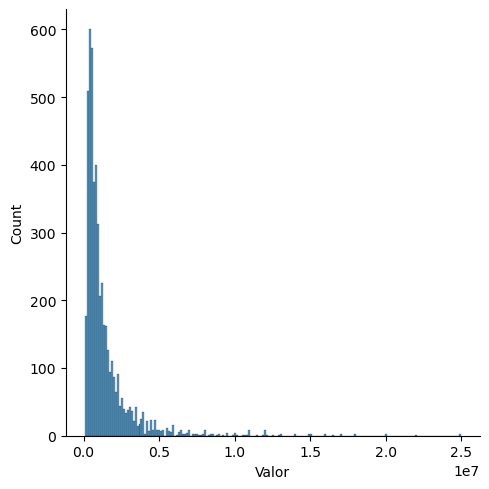

In [7]:
sns.displot(dados.Valor)

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


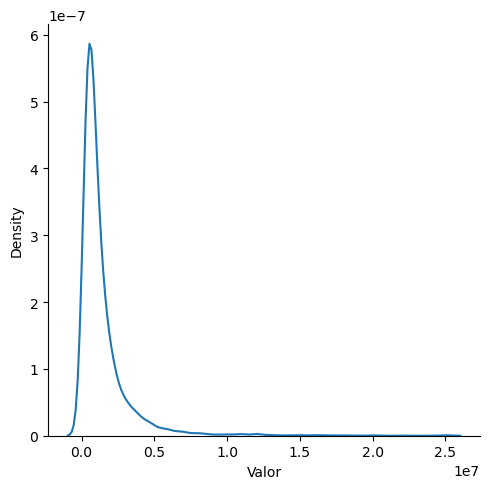

In [8]:
sns.displot(dados.Valor, kind = 'kde')

Realizando uma análise gráfica, a variavel dependente Valor possui um comportamente assimétrico para a direita devido provavelmente a um outlier

In [9]:
dados.Valor.max()

25000000

Esse valor máximo de Valor está tornando a distribuicao assimétrica

<Axes: >

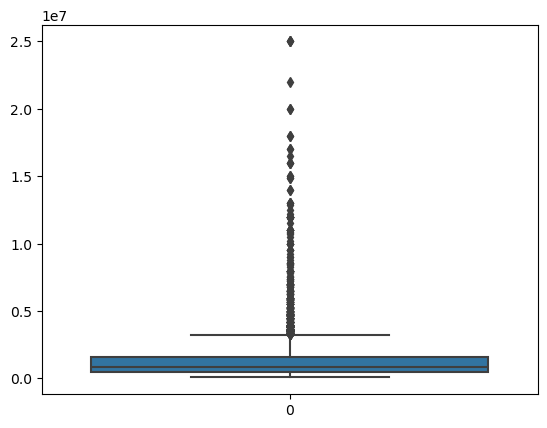

In [10]:
sns.boxplot(dados.Valor)

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


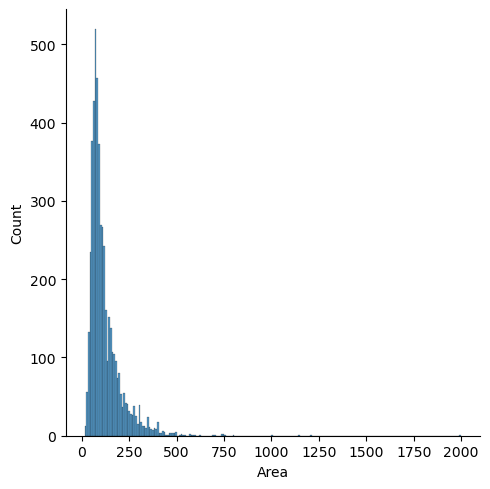

In [11]:
sns.displot(dados.Area)

<Axes: >

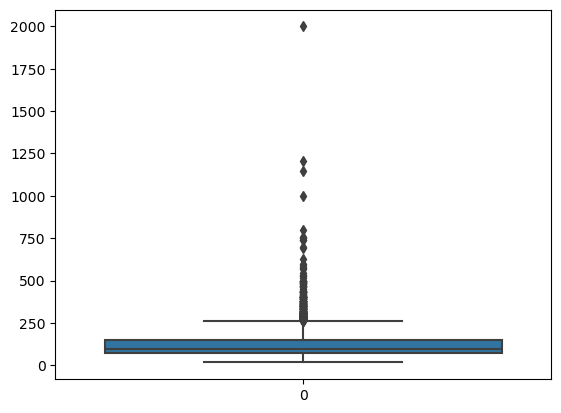

In [12]:
sns.boxplot(dados.Area)

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


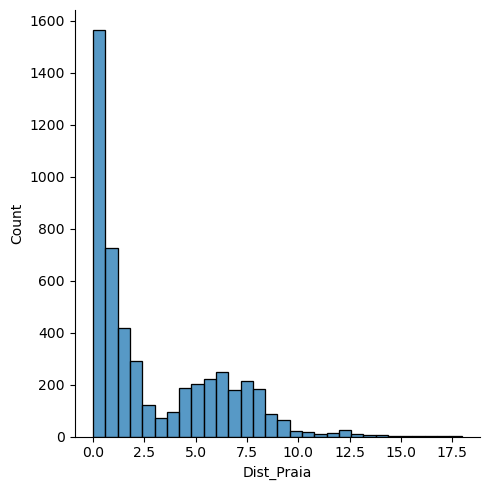

In [13]:
sns.displot(dados.Dist_Praia)

<Axes: >

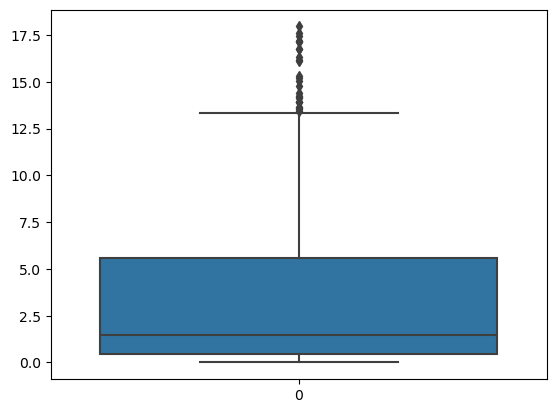

In [14]:
sns.boxplot(dados.Dist_Praia)

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


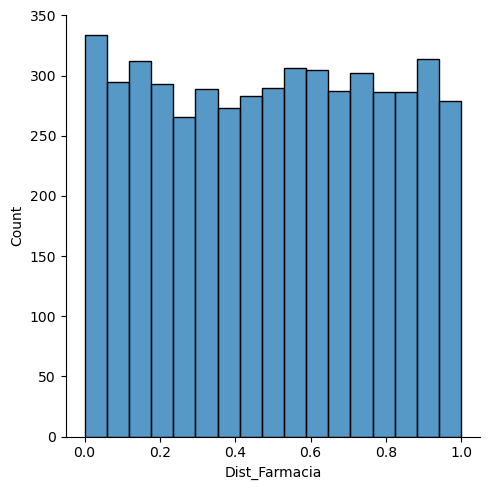

In [15]:
sns.displot(dados.Dist_Farmacia)

<Axes: >

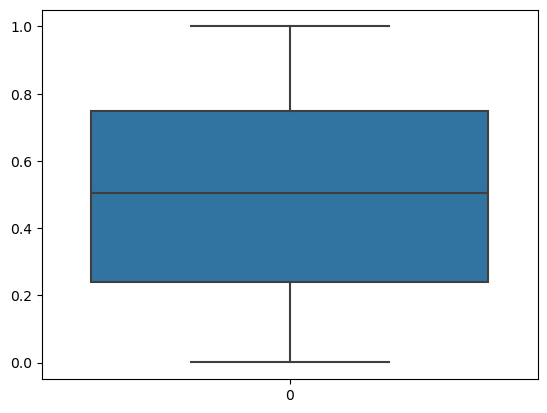

In [16]:
sns.boxplot(dados.Dist_Farmacia)

In [17]:
dados.corr()

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.000000,0.710974,-0.366542,-0.024366
Area,0.710974,1.000000,-0.283371,-0.030990
Dist_Praia,-0.366542,-0.283371,1.000000,0.025645
Dist_Farmacia,-0.024366,-0.030990,0.025645,1.000000


Através da análise da matriz de correlação, podemos perceber que a variavel dependente valor possui uma correlação positiva (alta) com Area e correlação negativa com Dist_Praia e Dist_Farmacia (muito baixo)

As variaveis explicativas Area e Dist_Praia possuem uma correlação negativa entre si, algo que não é tão alto e nao traz muitos problemas ao modelo

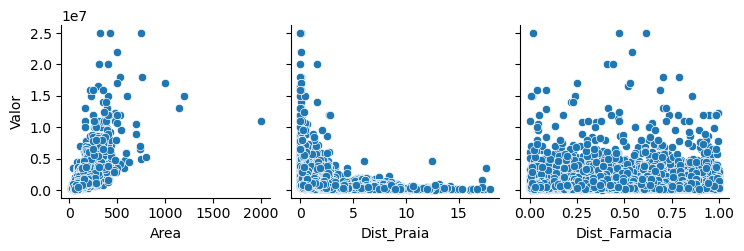

In [18]:
sns.pairplot(dados, x_vars = ['Area', 'Dist_Praia', 'Dist_Farmacia'], y_vars = 'Valor')

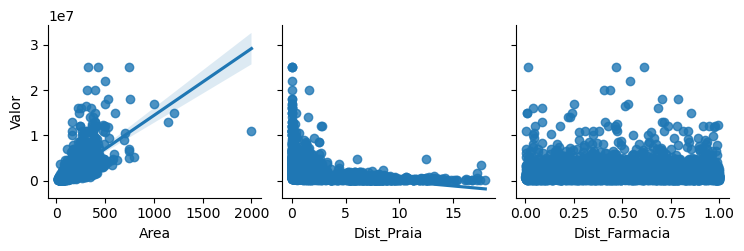

In [19]:
sns.pairplot(dados, x_vars = ['Area', 'Dist_Praia', 'Dist_Farmacia'], y_vars = 'Valor', kind = 'reg')

In [20]:
import numpy as np

In [21]:
dados['log_Valor'] = np.log(dados.Valor)

In [22]:
dados['log_Area'] = np.log(dados.Area)

In [23]:
dados['log_Dist_Praia'] = np.log(dados.Dist_Praia + 1)

In [24]:
dados['log_Dist_Farmacia'] = np.log(dados.Dist_Farmacia + 1)

In [25]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


<Axes: >

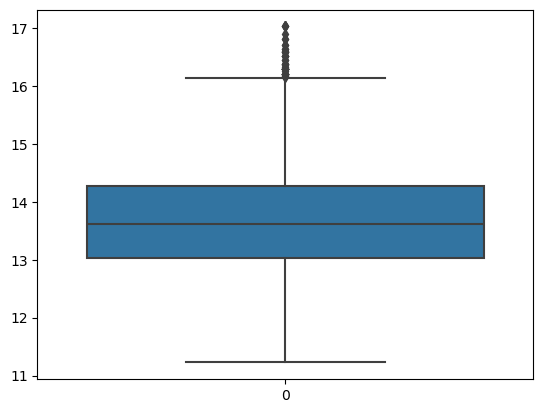

In [26]:
sns.boxplot(dados.log_Valor)

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


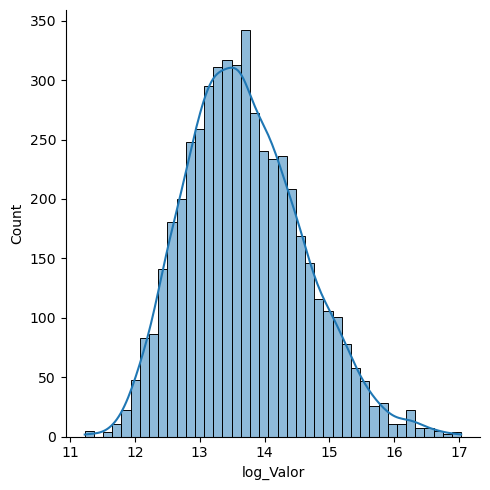

In [27]:
sns.displot(dados.log_Valor, kde = True)

Após aplicarmos a técnica da transformação logaritmica a variavel dependente valor assume uma distribuição normal

<Axes: >

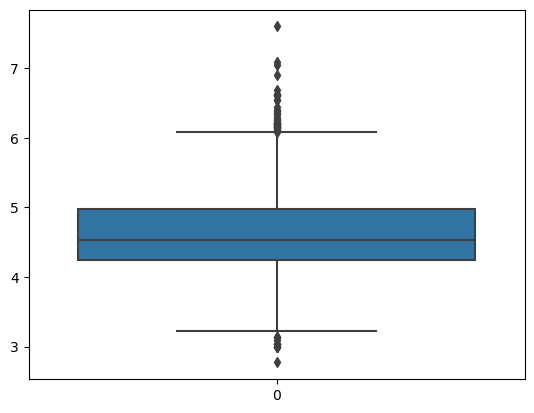

In [28]:
sns.boxplot(dados.log_Area)

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


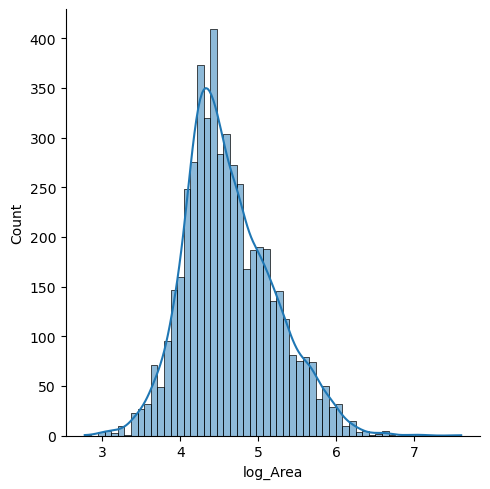

In [29]:
sns.displot(dados.log_Area, kde = True)

A variavel dependente area está se aplicando de uma normal depois da transformação

<Axes: >

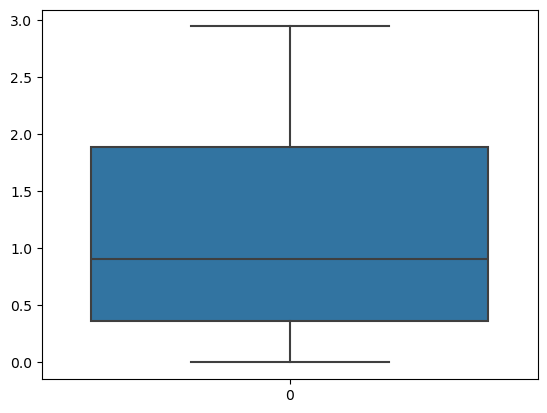

In [30]:
sns.boxplot(dados.log_Dist_Praia)

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


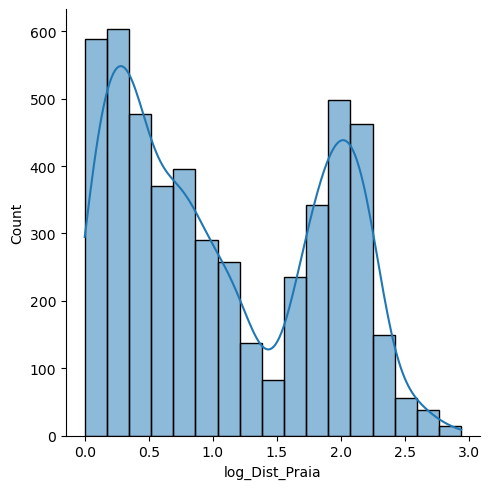

In [31]:
sns.displot(dados.log_Dist_Praia, kde = True)

A variavel dist_Praia nao está se aproximando de uma normal mesmo apos a transformação logaritmica

<Axes: >

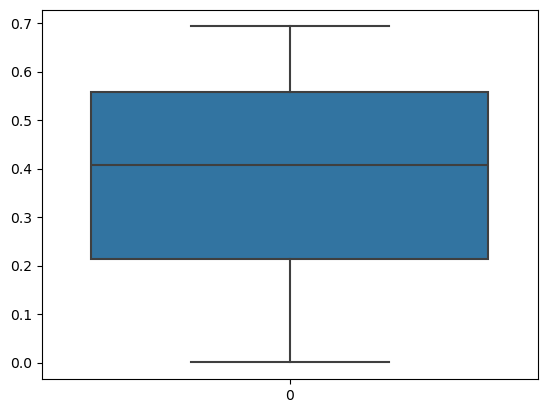

In [32]:
sns.boxplot(dados.log_Dist_Farmacia)

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


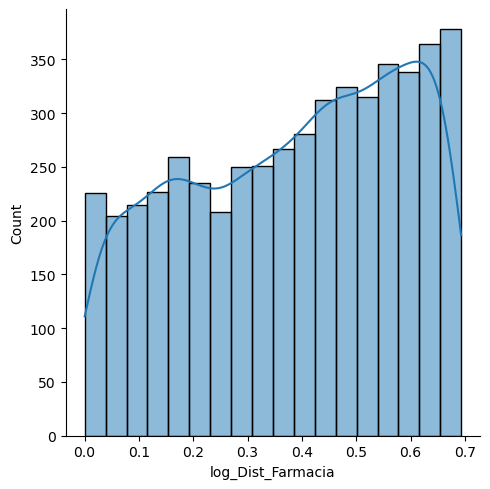

In [33]:
sns.displot(dados.log_Dist_Farmacia, kde = True)

A variavel dist_Farmacia mesmo apos a transformacao logaritmica nao se aproxima de uma normal

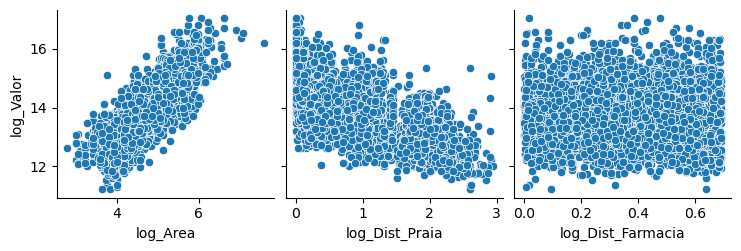

In [34]:
sns.pairplot(dados, x_vars = ['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia'], y_vars = ['log_Valor'])

Após a transformação logaritmica a relação linear entre a variavel dependente e as explicativas melhorou 

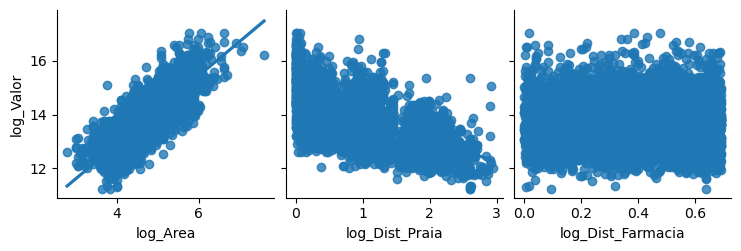

In [35]:
sns.pairplot(dados, x_vars = ['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia'], y_vars = ['log_Valor'], kind = 'reg')

In [36]:
from sklearn.model_selection import train_test_split

In [38]:
y = dados.log_Valor

In [42]:
X = dados[['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia']]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2811)

In [46]:
import statsmodels.api as sm

In [47]:
X_train_com_constante = sm.add_constant(X_train)

In [48]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

In [49]:
modelo_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Thu, 23 May 2024   Prob (F-statistic):               0.00
Time:                        09:46:12   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.060    154.734      0.000       9.223       9.460
log_Area              1.0580      0.012     89.320      0.000       1.035       1.081
log_Dist_Praia       -0.4905      0.009    -56.690      0.000      -0.508      -0.474
log_Dist_Farmacia    -0.0167      0.032     -0.521      0.603      -0.080       0.046
==============================================================================
Omnibus:                       64.751   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.858
Skew:                           0.136   Prob(JB):                     6.25e-24
Kurtosis:                       3.753   Cond. No.                         47.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analisando o teste F, ele testa a significancia conjunta das variaveis do modelo. Se o Prob(F) for maior ou igual a 0.05 o modelo não é estatisticamente significante. O teste testa conjuntamente se as variáveis valem zero.

Analisando o teste T, ele testa a significancia individual das variaveis do modelo. Se o Prob(T) for maior ou igual a 0.05, a variavel não é estatisticamente significante para o modelo. O teste testa se a variável vale zero

Com isso podemos verificar que o modelo é estatisticamente significante mas a variavel log_Dist_Farmacia não é estatiscamente significante. Portanto, para melhorar nosso modelo devemos realizar uma nova estimação

In [50]:
X = dados[['log_Area', 'log_Dist_Praia']]

In [51]:
y = dados.log_Valor

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2811)

In [54]:
X_train_com_constante = sm.add_constant(X_train)

In [55]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

In [57]:
modelo_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Thu, 23 May 2024   Prob (F-statistic):               0.00
Time:                        10:05:30   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.353      0.000       9.219       9.450
log_Area           1.0581      0.012     89.345      0.000       1.035       1.081
log_Dist_Praia    -0.4906      0.009    -56.709      0.000      -0.508      -0.474
==============================================================================
Omnibus:                       65.115   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.712
Skew:                           0.136   Prob(JB):                     4.08e-24
Kurtosis:                       3.757   Cond. No.                         46.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analisando as estatisticas de resumo do modelo, podemos perceber que todas as variaveis explicativas passaram no teste T, e , conjuntamente passaram no teste F. Portanto, nosso modelo e parametros são estatisticamente significantes e o modelo está bem estimado

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [61]:
modelo = LinearRegression()

In [62]:
modelo.fit(X_train, y_train)

LinearRegression()

In [63]:
modelo.score(X_train, y_train)

0.8048773977172845

In [64]:
y_previsto = modelo.predict(X_test)

In [65]:
metrics.r2_score(y_test, y_previsto)

0.7904430508603386

In [66]:
entrada = X_test[0:1]

In [68]:
modelo.predict(entrada)[0]

14.284820061847878

Como nossos dados foram transformados (transformacao logaritimica), esse valor está em log e devemos reverter essa transformacao para o valor verdadeiro

Para encontrar o valor original devemos aplicar a exponencial nesse valor logaritmico

In [69]:
np.exp(modelo.predict(entrada)[0])

1598889.7847794362

In [79]:
log_Area = 300
log_Dist_Praia = 1
entrada = [[np.log(log_Area), np.log(log_Dist_Praia) + 1]]

In [80]:
np.exp(modelo.predict(entrada)[0])

E:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2897479.899884138

In [81]:
modelo.intercept_

9.334916409800332

In [82]:
np.exp(modelo.intercept_)

11326.681428069882

In [83]:
modelo.coef_

array([ 1.05807818, -0.49061226])

In [84]:
index = ['Intercepto','Area', 'Dist_Praia']

In [87]:
pd.DataFrame(data = np.append(modelo.intercept_, modelo.coef_), index = index, columns = ['Parametros'])

,Parametros
Intercepto,9.334916
log_Area,1.058078
log_Dist_Praia,-0.490612


Intercepto -> Excluindo o efeito das variaveis explicativas X2=X3=0 o efeito medio no Valor dos Imoveis seria de R$11.326,68(exp(9.334916))

Area -> Mantendo-se o valor de X3 constante, um acrescimo de 1% na Area de um imovel gera em media um acrescimo de 1.06% no Preco do Imovel

Dist_Praia -> Mantendo-se o valor de X2 constante, um acrescimo de 1% na distancia de um imovel ate a praia gera em media um decrescimo de 0.49% no preco do imovel

# Analise Grafica dos Resultados do Modelo

In [88]:
y_previsto_train = modelo.predict(X_train)

<Axes: ylabel='log_Valor'>

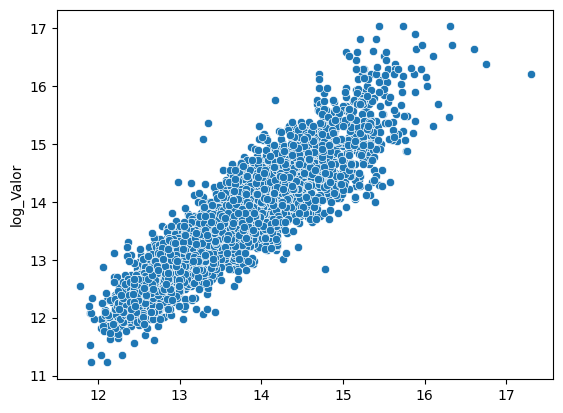

In [89]:
sns.scatterplot(x = y_previsto_train, y = y_train)

O residuo é a parte da variação que nao conseguiu ser explicada

In [92]:
residuo = y_train - y_previsto_train
residuo

2661    0.632221
912     0.103178
3042   -0.201268
141     0.798452
3854    0.099376
          ...   
3657    0.103408
979     0.222697
2389   -0.232015
447    -0.246490
2008   -0.195782
Name: log_Valor, Length: 4000, dtype: float64

O residuo deve seguir uma distribuicao Normal. Caso nao siga, temos problemas a solucionar

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


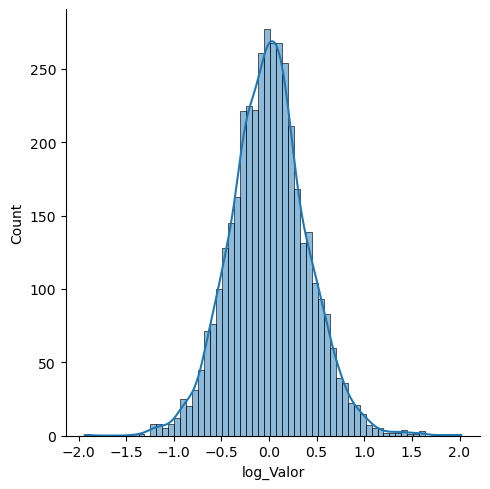

In [93]:
sns.displot(residuo, kde = True)

Os residuo segue uma Normal. Com isso o modelo esta bem estimado